## Import Data and Library

In [2]:
import numpy as np
import pandas as pd
import spacy 
import os
#from google.colab import drive
#drive.mount('/Plotting')

In [3]:
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib
import plotly.express as px
from plotly.subplots import make_subplots
import nltk
from nltk.corpus import stopwords
import string
import re
from nltk.tokenize import word_tokenize
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import json
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#import csv from google drive (complex way)
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
def read_csv():
  #path = "/Plotting/MyDrive/Colab Notebooks/Plotting/imdb_text.csv"
  link = 'https://drive.google.com/file/d/1zVdKeX3yLHtfz2FcyEbK_tq7UKxubtP2/view?usp=sharing'

  id = link.split("/")[-2]
 
  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile('imdb_text.csv') 

  df = pd.read_csv('imdb_text.csv')
  df['text']=df['text'].astype(str)
  df['target']=df['target'].astype(str)
  print(df)
  return df

test_df = read_csv()

       Unnamed: 0                                               text target
0               0  pandemonium is a horror movie spoof that comes...      0
1               1  david mamet is a very interesting and a very u...      0
2               2  great documentary about the lives of ny firefi...      1
3               3  its boggles the mind how this movie was nomina...      0
4               4  the concept of the legal gray area in love cri...      0
...           ...                                                ...    ...
44630       44630  theres a sign on the lost highway that says  m...      1
44631       44631  the willies starts late one night as brothers ...      0
44632       44632  the premise is interesting and the cast does t...      0
44633       44633  enchanting the best time to see this movie is ...      1
44634       44634  great movie oh yeah full of energy full of fun...      1

[44635 rows x 3 columns]


## Test plotting data

In [6]:
#To plot value distribution based on sentiment for both training and test set
def plot_distrib_train_test(test_df):
    fig=make_subplots(1,2,subplot_titles=("Training set", "Test set"))
    x=test_df.target.value_counts()
    fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['orange','green','red'],name=''),row=1,col=1)
    x=test_df.target.value_counts()
    fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['orange','green','red'],name=''),row=1,col=2)
    fig.show(renderer="colab") #to show figure in google colab

In [7]:
#To plot value distribution based on target for both training and test set
def show_word_distrib(df, target="0", field="text", top_N=10):
    fig = plt.figure()
    
    txt = df[df['target']==target][field].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(txt)
    words_except_stop_dist = nltk.FreqDist(words) 
    
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                        columns=['Word', 'Frequency Text']).set_index('Word')
    print(rslt)
    #matplotlib.style.use('ggplot')
    ax1 = fig.add_subplot()
    rslt.plot.bar(rot=0, ax=ax1)
    plt.show()
    plt.close()

Number of demo samples: 44635




Word distribution of 'text' in Demo set for positive samples


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



      Frequency Text
Word                
the           303786
and           156554
a             145830
of            136011
to            116835
is             99944
in             87907
it             68955
i              64244
this           61934


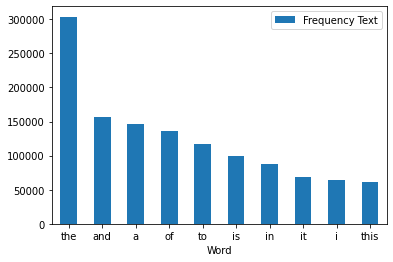



Word distribution of 'text' in Demo set for negative samples


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



      Frequency Text
Word                
the           289768
a             140434
and           130266
of            122150
to            121240
is             88026
in             77319
this           72032
i              71683
it             69300


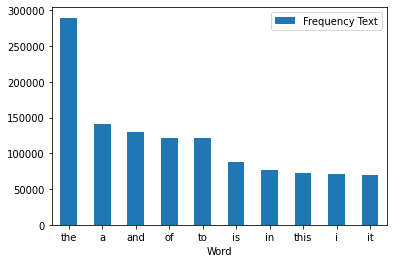

In [10]:
def general_stats(test_df):
    #n_train = len(train)
    #n_test = len(test)
    n_df = len(test_df)
    
    #print("Number of train samples: {}".format(n_train))
    #print("Number of test samples: {}".format(n_test))
    #plot_distrib_train_test(train, test)
    print("Number of demo samples: {}".format(n_df))
    plot_distrib_train_test(test_df)
    print("\n")
    
    print("Word distribution of 'text' in Demo set for positive samples")
    show_word_distrib(test_df, target="1")
    print("\n")
    
    print("Word distribution of 'text' in Demo set for negative samples")
    show_word_distrib(test_df, target="0")
    print("\n")

general_stats(test_df)

Character length


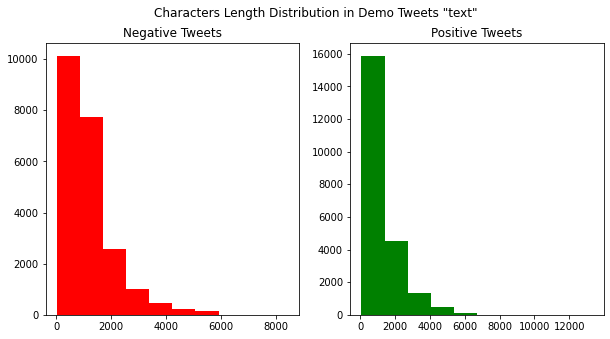


Sentence length


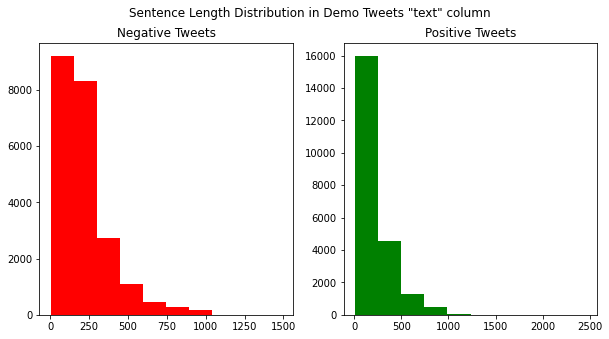

In [11]:
#To plot character length and word length distribution in training and test set
def to_plot_chars(df, _target, col="text"):
    return df[df['target']==_target][col].str.len()

def to_plot_word(df, _target, col="text"):
    return df[df['target']==_target][col].str.split().map(lambda x: len(x))

def plot_hist_classes(df, to_plot, _header, col="text"):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    
    df_len = to_plot(df, "0", col=col)
    ax1.hist(df_len,color='red')
    ax1.set_title('Negative Tweets')
    
    df_len = to_plot(df, "1", col=col)
    ax2.hist(df_len,color='green')
    ax2.set_title('Positive Tweets')    
    
    fig.suptitle(_header)
    plt.show()
    plt.close()

print("Character length")
plot_hist_classes(test_df, to_plot_chars, _header='Characters Length Distribution in Demo Tweets "text"')
print("\nSentence length")
plot_hist_classes(test_df, to_plot_word, _header='Sentence Length Distribution in Demo Tweets "text" column')

Average word length in Demo Tweets 'text' column



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



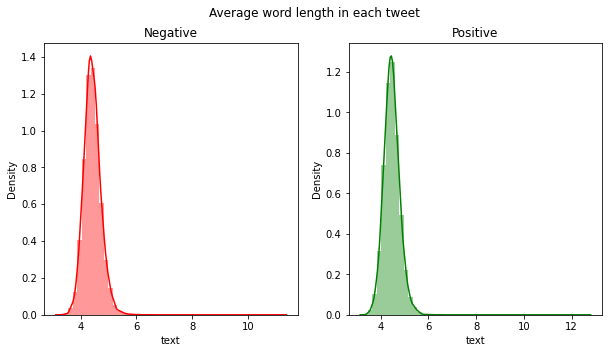

In [12]:
#To plot average word length distribution
def average_word_length(df,col="text"):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    
    word=df[df['target']=="0"][col].str.split().apply(lambda x : [len(i) for i in x])
    sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
    ax1.set_title('Negative')
    
    word=df[df['target']=="1"][col].str.split().apply(lambda x : [len(i) for i in x])
    sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
    ax2.set_title('Positive')
    
    fig.suptitle('Average word length in each tweet')
    plt.show()
    plt.close()

print("Average word length in Demo Tweets 'text' column\n")
average_word_length(test_df)

Number of unique word in Demo Tweets 'text' column



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



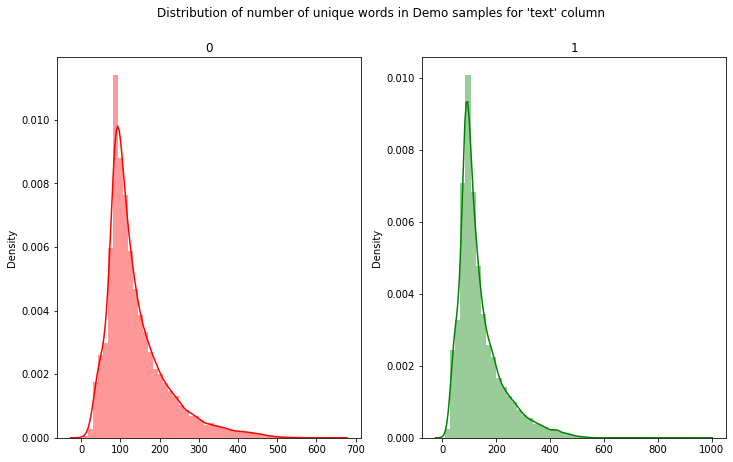

In [14]:
#To plot unique word distribution
def unique_words(df, col="text", title="Distribution of number of unique words"):
    fig,ax=plt.subplots(1,2,figsize=(12,7))
    colors = {
        "1": "green",
        "0": "red"
    }
    for _, i in enumerate(["0", "1"]):
        new=df[df['target']==i][col].map(lambda x: len(set(x.split())))
        sns.distplot(new.values,ax=ax[_],color=colors[i])
        ax[_].set_title(i)
    fig.suptitle(title)
    fig.show()

print("Number of unique word in Demo Tweets 'text' column\n")
unique_words(test_df, title="Distribution of number of unique words in Demo samples for 'text' column")

Bigram



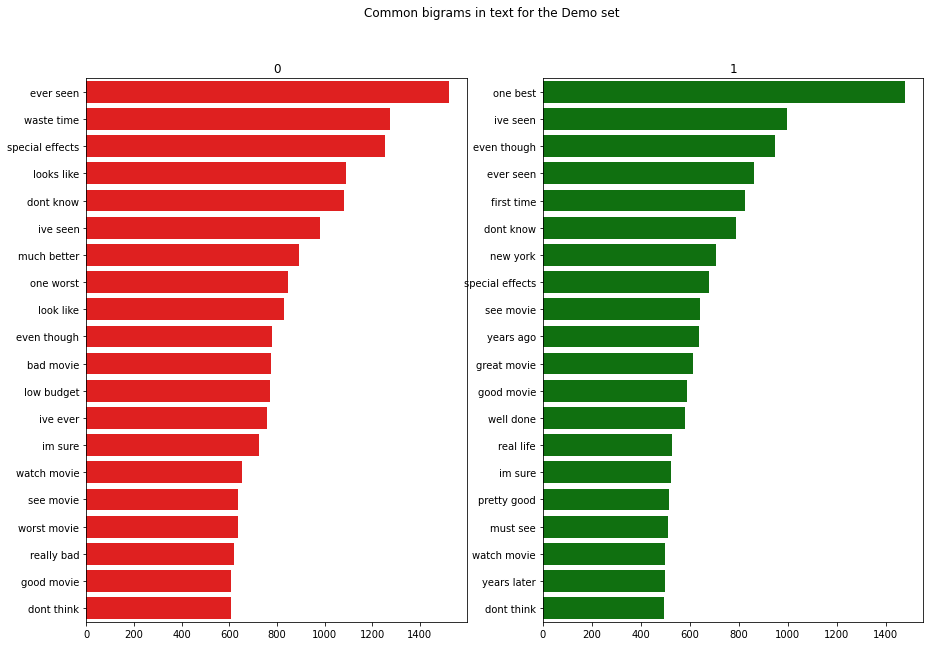

Trigram



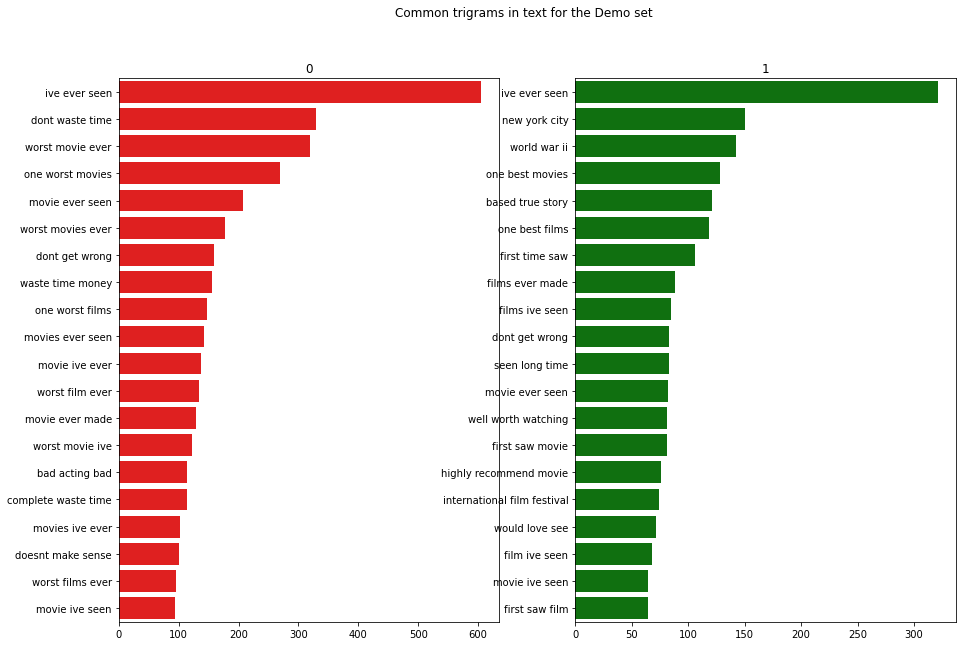

In [ ]:
#To plot common n-gram (n=2 || 3) in training or test set
def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n),stop_words=stop).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]
    
def plot_n_grams(df, size=2, 
                 title="Common bigrams in selected text",
                 column="text"):
    colors = {
        "1": "green",
        "0": "red",
    }
    
    fig,ax=plt.subplots(1,2,figsize=(15,10))
    for _, i in enumerate(["0", "1"]):
        new=df[df['target']==i][column]
        top_n_bigrams=get_top_ngram(new,size)[:20]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x,ax=ax[_],color=colors[i])
        ax[_].set_title(i)
    
    fig.suptitle(title)
    plt.show() 
    plt.close()

print("Bigram\n")
plot_n_grams(test_df, size=2, 
                 title="Common bigrams in text for the Demo set",
                 column="text")
print("Trigram\n")
plot_n_grams(test_df, size=3, 
                 title="Common trigrams in text for the Demo set",
                 column="text")